In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imdb

from collections import Counter

In [2]:
data = imdb.load_iris0()
X,y = data['data'], data['target']

In [3]:
X.shape

(150, 4)

In [4]:
def plotdata(X,y, title) :
    
    counter = Counter(y)

    plt.figure(figsize=(12,7))
    for label, _ in counter.items():
        row_ix = np.where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    print(counter)

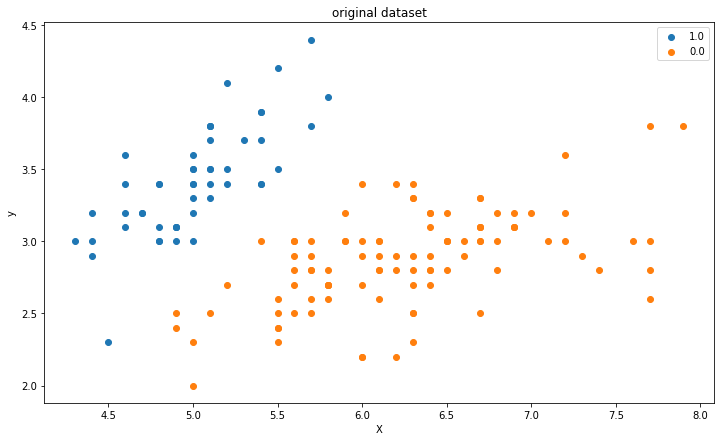

Counter({0.0: 100, 1.0: 50})


In [5]:
plotdata(X,y, "original dataset")

2021-05-28 10:08:22,479:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


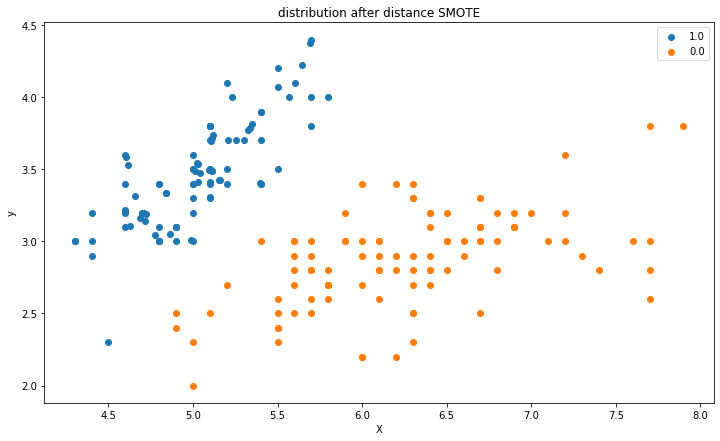

Counter({1.0: 100, 0.0: 100})


In [6]:
smote = sv.distance_SMOTE()

print(smote)

X_s, y_s = smote.sample(X,y)

plotdata(X_s,y_s, "distribution after distance SMOTE")

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from synthsonic.models.kde_copula_nn_pdf2 import KDECopulaNNPdf

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [13]:
model = DecisionTreeClassifier()

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 1.000


In [ ]:
class 

In [8]:
model = DecisionTreeClassifier()

pipe = Pipeline([
    ('synth', KDECopulaNNPdf()),
    ('model', model)
])